# Day 08. Exercise 00
# Binary classifier. Logistic regression

## 0. Imports

In [10]:
!pip install scikit-learn -q

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

## 1. Preprocessing

- Get the data from the file [`checker-timestamp.csv`](https://drive.google.com/file/d/1pooM4cITtG249msX3GK_6W0eEiblzAf5/view?usp=sharing).


- Create a dataframe `df` with the columns: `date`, `am`, `pm`, `target`, where `date` is the date of the day, `am` is the number of the commits during the day before midday (integer), `pm` is the number of commits during the day after midday (integer), `target` is weekend/working_day.

In [3]:
df = pd.read_csv('https://drive.google.com/uc?export=download&confirm=no_antivirus&id=1pooM4cITtG249msX3GK_6W0eEiblzAf5', parse_dates=['timestamp'])
df.head()

,timestamp
0,2020-04-17 05:19:02.744528
1,2020-04-17 05:22:35.249331
2,2020-04-17 05:22:45.549397
3,2020-04-17 05:34:14.691200
4,2020-04-17 05:34:24.422370


In [4]:
df['date'] = df['timestamp'].dt.date

In [5]:
am = df[df['timestamp'].dt.hour < 12] \
    .groupby('date', as_index=False) \
        .agg({'timestamp': 'count'}) \
            .rename(columns={'timestamp': 'am'})
pm = df[df['timestamp'].dt.hour > 11] \
    .groupby('date', as_index=False) \
        .agg({'timestamp': 'count'}) \
        .rename(columns={'timestamp': 'pm'})

In [6]:
df['target'] = df['date'] \
    .apply(lambda x: 'weekend' if pd.to_datetime(x).dayofweek in [5, 6] else 'working_day')
df.drop('timestamp', axis=1, inplace=True)
df = df.groupby('date', as_index=False) \
    .agg({'target': 'first'}) \
        .set_index('date')

In [7]:
df = df.merge(am, on='date', how='left').merge(pm, on='date', how='left').fillna(0)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35 entries, 0 to 34
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   date    35 non-null     object 
 1   target  35 non-null     object 
 2   am      35 non-null     float64
 3   pm      35 non-null     float64
dtypes: float64(2), object(2)
memory usage: 1.2+ KB


## 2. Exploratory analysis

- Create a plot where `x` is am, `y` is pm, each dot is a day, working days and weekends must have different colors.


- By looking at the graph do you think it will be easy to classify the days having those two features? Put your answer in the markdown cell in the end of that sectioin: "yes, it is easy" or "no, it is not easy".

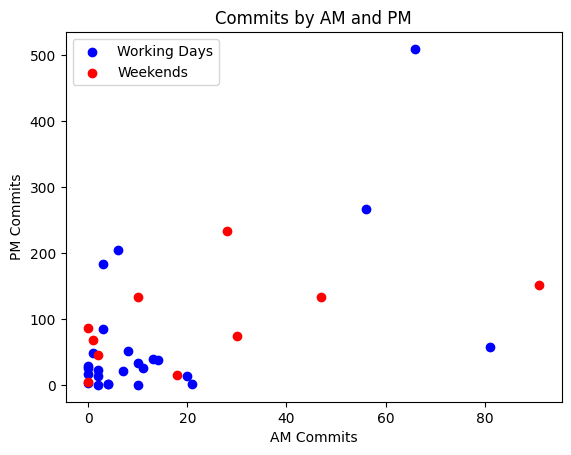

In [106]:
plt.scatter(df[df['target'] == 'working_day']['am'], 
            df[df['target'] == 'working_day']['pm'], 
            color='blue', 
            label='Working Days')
plt.scatter(df[df['target'] == 'weekend']['am'], 
            df[df['target'] == 'weekend']['pm'], 
            color='red', 
            label='Weekends')

plt.xlabel('AM Commits')
plt.ylabel('PM Commits')
plt.title('Commits by AM and PM')
plt.legend()

plt.show()

"no, it is not easy"

## 3. Logistic regression

- Train logistic regression on your data using `am` and `pm`, parameters are: `random state=21`, `fit_intercept=False`.


- Make predictions for every day of your dataset and add them to your dataframe with the column name `predict`.


- Save the dataframe into a file in the subfolder of the day `data` with the name `am_pm.csv`.


- Draw another plot like you did before, but the color should be taken from the `predict`.


- By looking at the graph do you think if it made good predictions? Put your answer in the markdown cell in the end of that section: "yes, it is good"; "no, it is not good".

In [9]:
X_train = df[['am', 'pm']]
y_train = df['target']

lr = LogisticRegression(random_state=21, fit_intercept=False)

lr.fit(X_train, y_train)
y_pred = lr.predict(X_train)

In [10]:
df['predict'] = y_pred

In [11]:
df.head(10)

,date,target,am,pm,predict
0,2020-04-17,working_day,21.0,2.0,weekend
1,2020-04-18,weekend,1.0,68.0,working_day
2,2020-04-19,weekend,18.0,15.0,working_day
3,2020-04-20,working_day,2.0,23.0,working_day
4,2020-04-21,working_day,0.0,25.0,working_day
5,2020-04-22,working_day,0.0,28.0,working_day
6,2020-04-23,working_day,10.0,33.0,working_day
7,2020-04-24,working_day,2.0,14.0,working_day
8,2020-04-25,weekend,30.0,74.0,working_day
9,2020-04-26,weekend,28.0,233.0,working_day


In [17]:
!mkdir ../data

In [12]:
df.to_csv('../data/am_pm.csv', index=False)

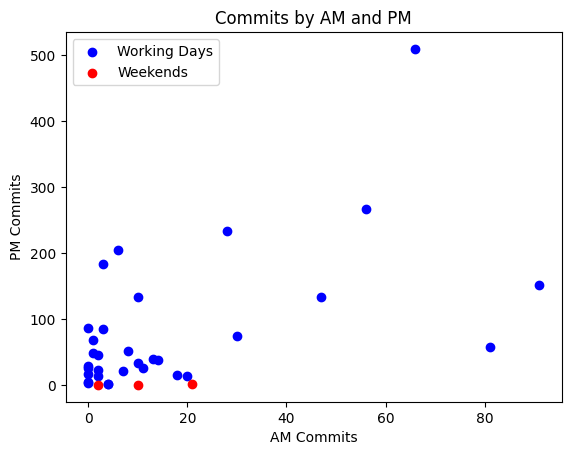

In [111]:
plt.scatter(df[df['predict'] == 'working_day']['am'], 
            df[df['predict'] == 'working_day']['pm'], 
            color='blue', 
            label='Working Days')
plt.scatter(df[df['predict'] == 'weekend']['am'], 
            df[df['predict'] == 'weekend']['pm'], 
            color='red', 
            label='Weekends')

plt.xlabel('AM Commits')
plt.ylabel('PM Commits')
plt.title('Commits by AM and PM')
plt.legend()

plt.show()

"no, it is not good"

## 4. Evaluation

- Calculate `accuracy` for your predictions.


- Calculate `accuracy` for the naive case when each of your prediction is the value of your most popular class of the day.


- Comparing the accuracies do you think that the classifier made good predictions? Put your answer in the markdown cell in the end of the secion: "yes, it is good"; "no, it is not good".

In [112]:
accuracy_score(y_train, y_pred)

0.6285714285714286

In [113]:
accuracy_score(y_train, df['target'].apply(lambda x: df['target'].mode()))

0.7142857142857143

"no, it is not good"